In [26]:
import numpy as np
import cv2
import skimage
from skimage import io
import matplotlib.pyplot as plt

# Shape processor part

In [3]:
font = cv2.FONT_HERSHEY_COMPLEX

In [4]:
img = cv2.imread("shape.png", cv2.IMREAD_GRAYSCALE)
_, threshold = cv2.threshold(img, 240, 255, cv2.THRESH_BINARY)
contours, _=cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [5]:
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
    cv2.drawContours(img, [approx], 0, (0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1]
    if len(approx) == 3:
        cv2.putText(img, "Triangle", (x, y), font, 1, (0))
    elif len(approx) == 4:
        cv2.putText(img, "Rectangle", (x, y), font, 1, (0))
    elif len(approx) == 5:
        cv2.putText(img, "Pentagon", (x, y), font, 1, (0))
    elif 6 < len(approx) < 15:
        cv2.putText(img, "Ellipse", (x, y), font, 1, (0))
    else:
        cv2.putText(img, "Circle", (x, y), font, 1, (0))

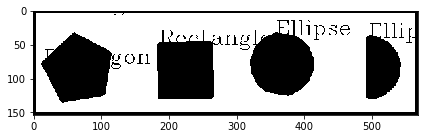

In [16]:
io.imshow(img)

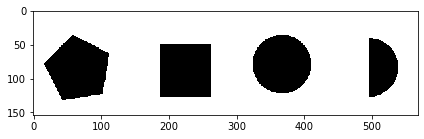

In [17]:
io.imshow(threshold)

# Edge recognization for our data

In [34]:
img = cv2.imread("example_images/sem_1.jpg", cv2.IMREAD_GRAYSCALE)
_, threshold = cv2.threshold(img, 240, 255, cv2.THRESH_BINARY)
contours, _=cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

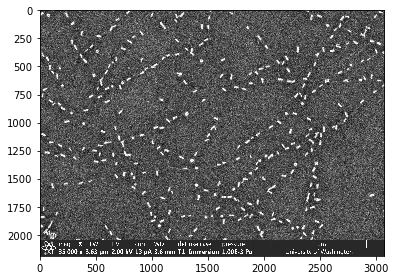

In [20]:
io.imshow(img)

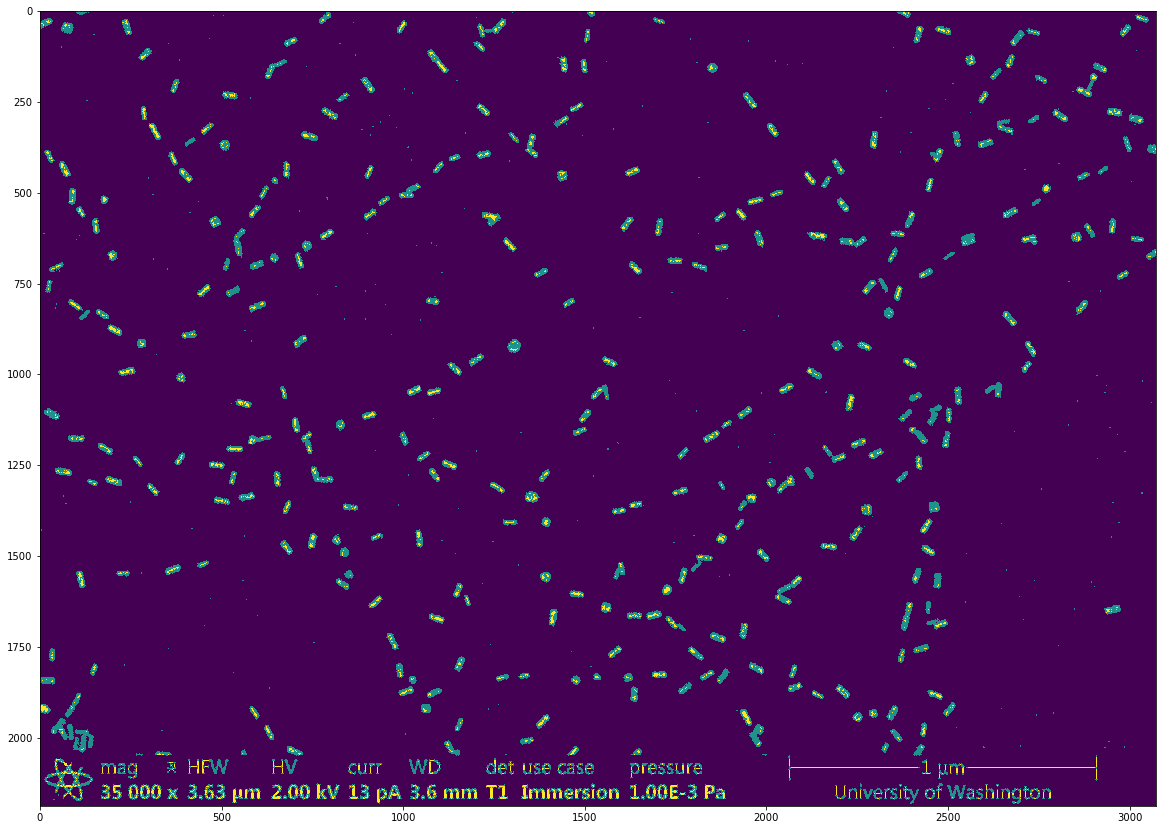

In [65]:
imgray = cv2.imread("example_images/sem_1.jpg", cv2.IMREAD_GRAYSCALE)
#imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
# Contoured image
ret,thresh = cv2.threshold(imgray, 200,255,cv2.THRESH_BINARY)
contours = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[-2]
for contour in contours:
    cv2.drawContours(thresh, contour, -1, (130, 0, 0), 3)
plt.figure(figsize=(20,16))
plt.imshow(thresh)